In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib_inline

UsageError: Line magic function `%matplotlib_inline` not found.


In [ ]:
X_train = np.array([[1,1,1],[1,0,1],[1,0,0],[1,0,0],[1,1,1],[0,1,1],[0,0,0],[1,0,1],[0,1,0],[1,0,0]])
y_train = np.array([1,1,0,0,1,0,0,1,1,0])


## Problem Statement

Suppose you are starting a company that grows and sells wild mushrooms. 
- Since not all mushrooms are edible, you'd like to be able to tell whether a given mushroom is edible or poisonous based on it's physical attributes
- You have some existing data that you can use for this task. 

Can you use the data to help you identify which mushrooms can be sold safely? 

Note: The dataset used is for illustrative purposes only. It is not meant to be a guide on identifying edible mushrooms.



##  Dataset

You will start by loading the dataset for this task. The dataset you have collected is as follows:

|                                                     | Cap Color | Stalk Shape | Solitary | Edible |
|:---------------------------------------------------:|:---------:|:-----------:|:--------:|:------:|
| <img src="images/0.png" alt="drawing" width="50"/> |   Brown   |   Tapering  |    Yes   |    1   |
| <img src="images/1.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    Yes   |    1   |
| <img src="images/2.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    No    |    0   |
| <img src="images/3.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    No    |    0   |
| <img src="images/4.png" alt="drawing" width="50"/> |   Brown   |   Tapering  |    Yes   |    1   |
| <img src="images/5.png" alt="drawing" width="50"/> |    Red    |   Tapering  |    Yes   |    0   |
| <img src="images/6.png" alt="drawing" width="50"/> |    Red    |  Enlarging  |    No    |    0   |
| <img src="images/7.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    Yes   |    1   |
| <img src="images/8.png" alt="drawing" width="50"/> |    Red    |   Tapering  |    No    |    1   |
| <img src="images/9.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    No    |    0   |


-  You have 10 examples of mushrooms. For each example, you have
    - Three features
        - Cap Color (`Brown` or `Red`),
        - Stalk Shape (`Tapering (as in \/)` or `Enlarging (as in /\)`), and
        - Solitary (`Yes` or `No`)
    - Label
        - Edible (`1` indicating yes or `0` indicating poisonous)

### One hot encoded dataset
For ease of implementation, we have one-hot encoded the features (turned them into 0 or 1 valued features)

|                                                    | Brown Cap | Tapering Stalk Shape | Solitary | Edible |
|:--------------------------------------------------:|:---------:|:--------------------:|:--------:|:------:|
| <img src="images/0.png" alt="drawing" width="50"/> |     1     |           1          |     1    |    1   |
| <img src="images/1.png" alt="drawing" width="50"/> |     1     |           0          |     1    |    1   |
| <img src="images/2.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |
| <img src="images/3.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |
| <img src="images/4.png" alt="drawing" width="50"/> |     1     |           1          |     1    |    1   |
| <img src="images/5.png" alt="drawing" width="50"/> |     0     |           1          |     1    |    0   |
| <img src="images/6.png" alt="drawing" width="50"/> |     0     |           0          |     0    |    0   |
| <img src="images/7.png" alt="drawing" width="50"/> |     1     |           0          |     1    |    1   |
| <img src="images/8.png" alt="drawing" width="50"/> |     0     |           1          |     0    |    1   |
| <img src="images/9.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |


Therefore,
- `X_train` contains three features for each example 
    - Brown Color (A value of `1` indicates "Brown" cap color and `0` indicates "Red" cap color)
    - Tapering Shape (A value of `1` indicates "Tapering Stalk Shape" and `0` indicates "Enlarging" stalk shape)
    - Solitary  (A value of `1` indicates "Yes" and `0` indicates "No")

- `y_train` is whether the mushroom is edible 
    - `y = 1` indicates edible
    - `y = 0` indicates poisonous

In [52]:

X_train[:]
y_train[:]

y_train.shape
X_train.shape

(10, 3)

### entropy

In [17]:
## calculate the entropy

def compute_entropy(y):
    entropy=0
    if len(y)!=0:
        p1=len(y[y==1])/len(y)
        p0=1-p1

        if p1!=0 and p1!=1:
            entropy=-p1*np.log2(p1)-p0*np.log2(p0)
    return entropy

In [18]:
compute_entropy(y_train)

1.0

In [31]:
X_train

array([[1, 1, 1],
       [1, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 1, 1],
       [0, 1, 1],
       [0, 0, 0],
       [1, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [39]:
X_train[:4,2]

array([1, 1, 0, 0])

### split

In [41]:
def split(X,node_indices,features):
    left_indices=[]
    right_indices=[]

    for i in node_indices:
        if X[:i+1,features][i]==1:    # for the first feature only
            left_indices.append(i)
        else:
            right_indices.append(i)
    
    return left_indices ,right_indices

In [23]:
root_indices=[0,1,2,3,4,5,6,7,8,9]
features=0

left_indices,right_indices=split(X_train,root_indices,features)
print(left_indices)
print(right_indices)

[0, 1, 2, 3, 4, 7, 9]
[5, 6, 8]


### visulaize the split

In [29]:
import networkx as nx
from PIL import Image
from networkx.drawing.nx_pydot import graphviz_layout
def generate_node_image(node_indices):
    image_paths = ["images/%d.png" % idx for idx in node_indices]
    images = [Image.open(x) for x in image_paths]
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset,0))
        x_offset += im.size[0]
    
    new_im = new_im.resize((int(total_width*len(node_indices)/10), int(max_height*len(node_indices)/10)))
    
    return new_im
def generate_split_viz(node_indices, left_indices, right_indices, feature):
    
    G=nx.DiGraph()
    
    indices_list = [node_indices, left_indices, right_indices]
    for idx, indices in enumerate(indices_list):
        G.add_node(idx,image= generate_node_image(indices))

    G.add_edge(0,1)
    G.add_edge(0,2)

    pos = graphviz_layout(G, prog="dot")

    fig=plt.figure()
    ax=plt.subplot(111)
    ax.set_aspect('equal')
    nx.draw_networkx_edges(G,pos,ax=ax, arrows=True, arrowsize=40)
    
    trans=ax.transData.transform
    trans2=fig.transFigure.inverted().transform

    feature_name = ["Brown Cap", "Tapering Stalk Shape", "Solitary"][feature]
    ax_name = ["Splitting on %s" % feature_name , "Left: %s = 1" % feature_name, "Right: %s = 0" % feature_name]
    for idx, n in enumerate(G):
        xx,yy=trans(pos[n]) # figure coordinates
        xa,ya=trans2((xx,yy)) # axes coordinates
        piesize = len(indices_list[idx])/9
        p2=piesize/2.0
        a = plt.axes([xa-p2,ya-p2, piesize, piesize])
        a.set_aspect('equal')
        a.imshow(G.nodes[n]['image'])
        a.axis('off')
        a.set_title(ax_name[idx])
    ax.axis('off')
    plt.show()
    

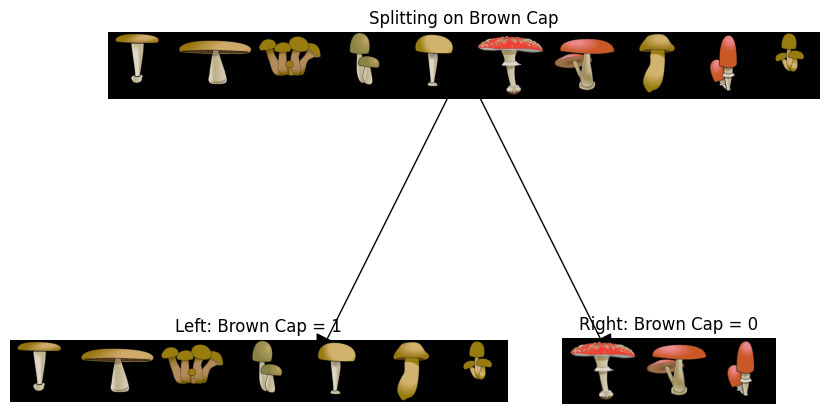

In [30]:
generate_split_viz(root_indices, left_indices, right_indices, features)

### calculate information gain

$$\text{Information Gain} = H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$

In [49]:
def compute_information_gain(X,y,node_indices,features):
    left_indices,right_indices=split(X_train,node_indices,features)

    X_node,y_node=X[node_indices],y[node_indices]
    X_left,y_left=X[left_indices],y[left_indices]
    X_right,y_right=X[right_indices],y[right_indices]

    information_gain=0

    entropy_node=compute_entropy(y_node)
    entropy_left=compute_entropy(y_left)
    entropy_right=compute_entropy(y_right)

    w_left=len(X_left)/len(X_node)
    w_right=len(X_right)/len(X_node)

    w_entropy=(w_left*entropy_left)+(w_right*entropy_right)

    information_gain=entropy_node-w_entropy

    return information_gain

In [50]:
info_gain0 = compute_information_gain(X_train, y_train, root_indices, features=0)
print("Information Gain from splitting the root on brown cap: ", info_gain0)

info_gain1 = compute_information_gain(X_train, y_train, root_indices, features=1)
print("Information Gain from splitting the root on tapering stalk shape: ", info_gain1)

info_gain2 = compute_information_gain(X_train, y_train, root_indices, features=2)
print("Information Gain from splitting the root on solitary: ", info_gain2)

Information Gain from splitting the root on brown cap:  0.034851554559677034
Information Gain from splitting the root on tapering stalk shape:  0.12451124978365313
Information Gain from splitting the root on solitary:  0.2780719051126377


Splitting on "Solitary" (feature = 2) at the root node gives the maximum information gain. Therefore, it's the best feature to split on at the root node.

### get best split

In [53]:
def better_split(X,y,node_indices):
    num_features=X.shape[1]
    best_feature=-1

    max_info_gain=0
    
    for features in range(num_features):
        info_gain=compute_information_gain(X,y,node_indices,features)
        if info_gain>max_info_gain:
            max_info_gain=info_gain
            best_feature=features
    return best_feature

In [55]:
best_feature=better_split(X_train,y_train,root_indices)
best_feature

2

### building tree

In [60]:
tree=[]
def tree_recursive(X,y,node_indices,branch_name,max_depth,current_depth):
   
    # Maximum depth reached - stop splitting
    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return
   
    # Otherwise, get best split and split the data
    # Get the best feature and threshold at this node
    best_feature = better_split(X, y, node_indices) 
    formatting="-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))

    # Split the dataset at the best feature
    left_indices, right_indices = split(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))
    
    # continue splitting the left and the right child. Increment current depth
    tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1)
    tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1)

In [64]:
tree_recursive(X_train, y_train, root_indices, "Root", max_depth=2, current_depth=0)

 Depth 0, Root: Split on feature: 2
- Depth 1, Left: Split on feature: 0
  -- Left leaf node with indices [0, 1, 4, 7]
  -- Right leaf node with indices [5]
- Depth 1, Right: Split on feature: 1
  -- Left leaf node with indices [8]
  -- Right leaf node with indices [2, 3, 6, 9]


In [62]:
def generate_tree_viz(root_indices, y, tree):
    
    G=nx.DiGraph()
    
    
    G.add_node(0,image= generate_node_image(root_indices))
    idx = 1
    root = 0
    
    num_images = [len(root_indices)]
    
    feature_name = ["Brown Cap", "Tapering Stalk Shape", "Solitary"]
    y_name = ["Poisonous","Edible"]
    
    decision_names = []
    leaf_names = []
    
    for i, level in enumerate(tree):
        indices_list = level[:2]
        for indices in indices_list:
            G.add_node(idx,image= generate_node_image(indices))
            G.add_edge(root, idx)
            
            # For visualization
            num_images.append(len(indices))
            idx += 1
            if i > 0:
                leaf_names.append("Leaf node: %s" % y_name[max(y[indices])])
            
        decision_names.append("Split on: %s" % feature_name[level[2]])
        root += 1
    
    
    node_names = decision_names + leaf_names
    pos = graphviz_layout(G, prog="dot")

    fig=plt.figure(figsize=(14, 10))
    ax=plt.subplot(111)
    ax.set_aspect('equal')
    nx.draw_networkx_edges(G,pos,ax=ax, arrows=True, arrowsize=40)
    
    trans=ax.transData.transform
    trans2=fig.transFigure.inverted().transform

    for idx, n in enumerate(G):
        xx,yy=trans(pos[n]) # figure coordinates
        xa,ya=trans2((xx,yy)) # axes coordinates
        piesize = num_images[idx]/25
        p2=piesize/2.0
        a = plt.axes([xa-p2,ya-p2, piesize, piesize])
        a.set_aspect('equal')
        a.imshow(G.nodes[n]['image'])
        a.axis('off')
        a.set_title(node_names[idx], y=-0.8, fontsize=13, loc="left")
    ax.axis('off')
    plt.show()

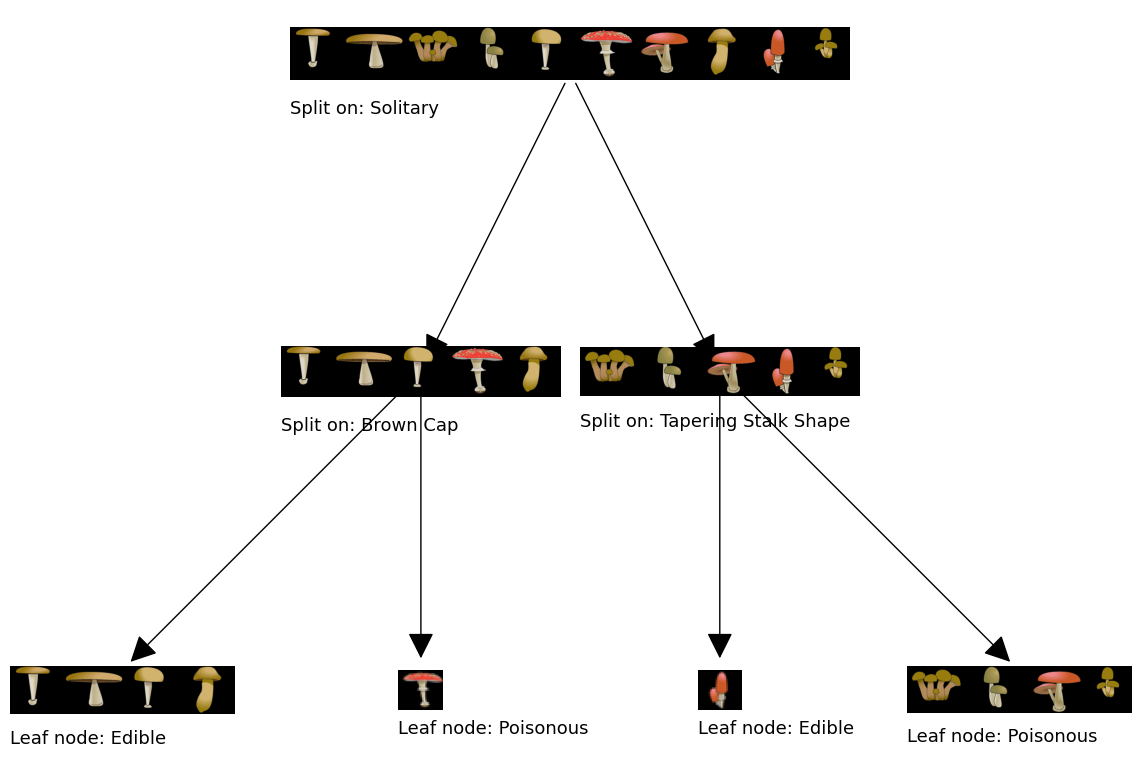

In [63]:
generate_tree_viz(root_indices, y_train, tree)